# Разбор ДЗ 1

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.

2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности? 

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)
   

In [2]:
from sklearn.datasets import load_iris
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_ = load_iris()# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных
iris_data = iris_.data

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = iris_.target
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [3]:
X_train[:4,:]

array([[0.79524064, 0.54144043, 0.27072022, 0.03384003],
       [0.7431482 , 0.36505526, 0.5345452 , 0.16948994],
       [0.76185188, 0.34011245, 0.53057542, 0.14964948],
       [0.80327412, 0.55126656, 0.22050662, 0.04725142]])

In [4]:
y_train[:4,:]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [5]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов

# заверну сеть в функцию, так проще делать перезапуски

def neuro_net2(neuro=5, n = 0.1,epoch=1000 , verbose = 0,X_train=None,y_train=None,X_test=None,y_test=None, test_v = 1):
  #В функцию передаю:
  # neuro=5, - число нейронов скрытого слоя
  #n = 0.1, - скорость обучения
  #epoch=1000 , - число эпох
  #verbose = 0,- выводить ли графику
  #X_train=None,y_train=None,X_test=None,y_test=None - данные для обучения и теста

  w0 = 2*np.random.random((X_train.shape[1], neuro)) - 1 # для входного слоя   - 4 входа, neuro выхода
  w1 = 2*np.random.random((neuro, y_train.shape[1])) - 1 # для внутреннего слоя - neuron1 входов, 3 выхода
  

  # скорость обучения (learning rate)
  #n = 0.1

  # массив для ошибок, чтобы потом построить график
  errors = []
  # массив для ошибок теста, чтобы потом построить график
  errorst = []
  
  # процесс обучения
  for i in range(epoch):
    # прямое распространение(feed forward)
    j = np.random.randint(X_train.shape[0])
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    
    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    # коррекция
  
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

    # делаем тесты

    if test_v==1:
      layer0t = X_test
      layer1t = sigmoid(np.dot(layer0t, w0))
      layer2t = sigmoid(np.dot(layer1t, w1))
     
      layer2t_error = y_test - layer2t

      errort = np.mean(np.abs(layer2t_error))
      errorst.append(errort)

  ### Шаг 4. Демонстрация полученных результатов
  # точность от эпохи 
  
  if verbose != 0:
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # 
        
    print("Точность нейронной сети " + str(round(accuracy,2)) + "%")
  return errors, accuracy, w1,w0, layer2, layer2t, errorst  

def neuro_net3(neuro=5, n = 0.1,epoch=1000 , verbose = 0,X_train=None,y_train=None,X_test=None,y_test=None, test_v = 1):
  #В функцию передаю:
  # neuro=5, - число нейронов скрытого слоя
  #n = 0.1, - скорость обучения
  #epoch=1000 , - число эпох
  #verbose = 0,- выводить ли графику
  #X_train=None,y_train=None,X_test=None,y_test=None - данные для обучения и теста
  neuron1 =5
  w0 = 2*np.random.random((X_train.shape[1], neuro)) - 1 # для входного слоя   - 4 входа, neuro выхода
  w1 = 2*np.random.random((neuro, neuron1)) -1 # для внутреннего слоя - neuro,  входов, neuron1 выхода
  w2 = 2*np.random.random((neuron1, y_train.shape[1])) - 1 # для внутреннего слоя - neuron1 входов, 3 выхода
  

  # скорость обучения (learning rate)
  #n = 0.1

  # массив для ошибок, чтобы потом построить график
  errors = []
  # массив для ошибок теста, чтобы потом построить график
  errorst = []
  
  # процесс обучения
  for i in range(epoch):
    # прямое распространение(feed forward)
    j = np.random.randint(X_train.shape[0])
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))
    
    # обратное распространение(back propagation) с использованием градиентного спуска
    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)

    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    # коррекция
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100

    # делаем тесты

    if test_v==1:
      layer0t = X_test
      layer1t = sigmoid(np.dot(layer0t, w0))
      layer2t = sigmoid(np.dot(layer1t, w1))
      layer3t = sigmoid(np.dot(layer2t, w2))

      layer3t_error = y_test - layer3t

      errort = np.mean(np.abs(layer3t_error))
      errorst.append(errort)

  ### Шаг 4. Демонстрация полученных результатов
  # точность от эпохи 
  
  if verbose != 0:
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # 
        
    print("Точность нейронной сети " + str(round(accuracy,2)) + "%")
  return errors, accuracy, w1,w0, layer2, layer2t, errorst  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

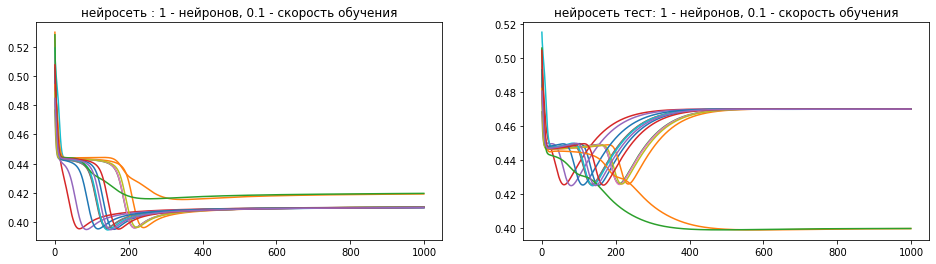

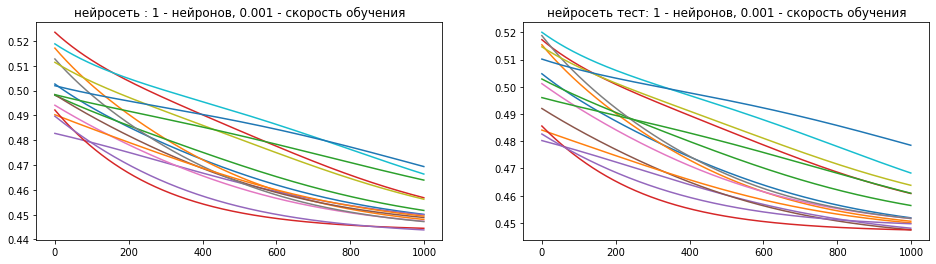

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp


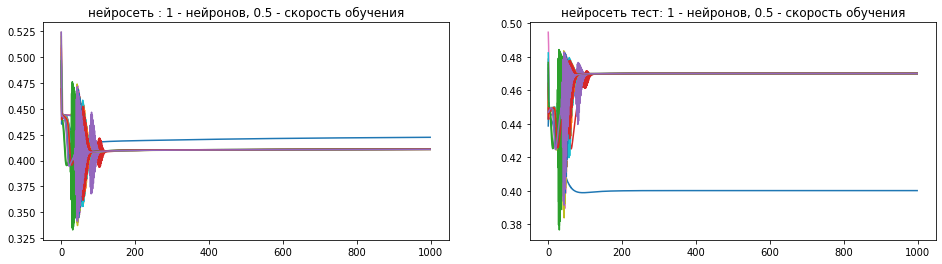

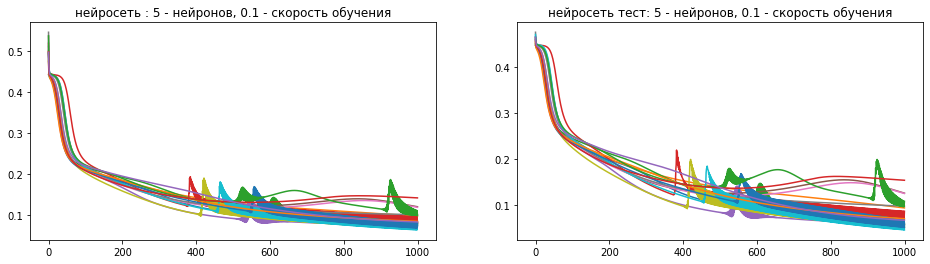

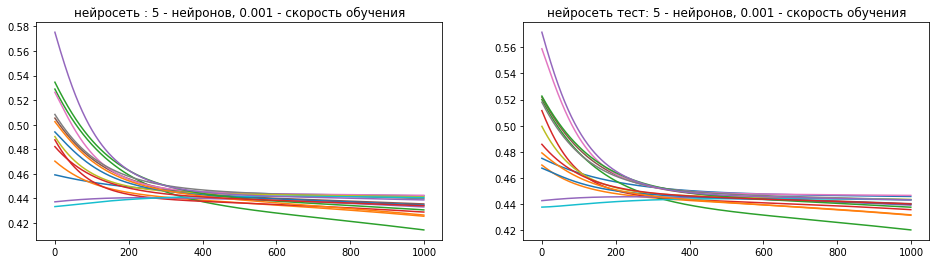

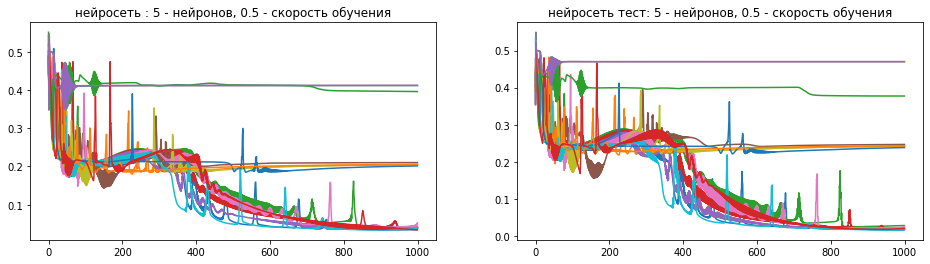

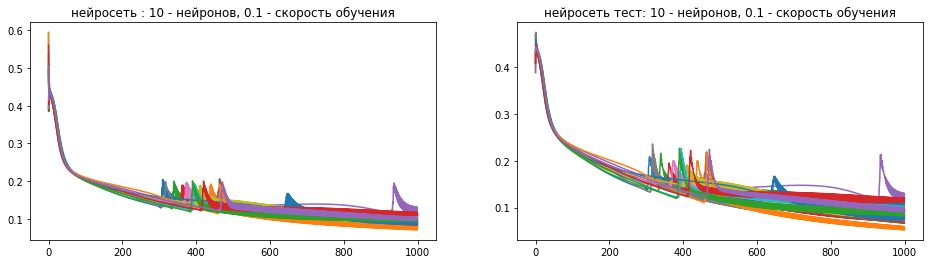

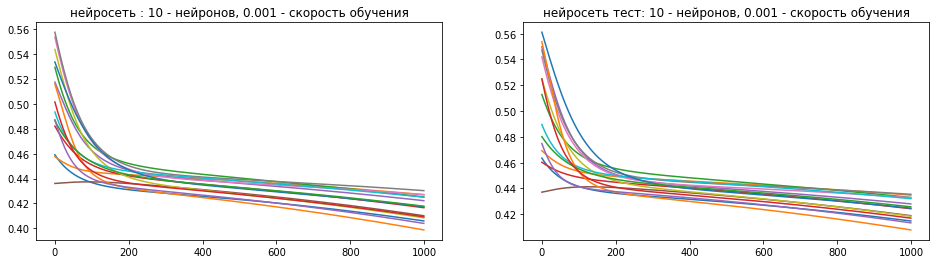

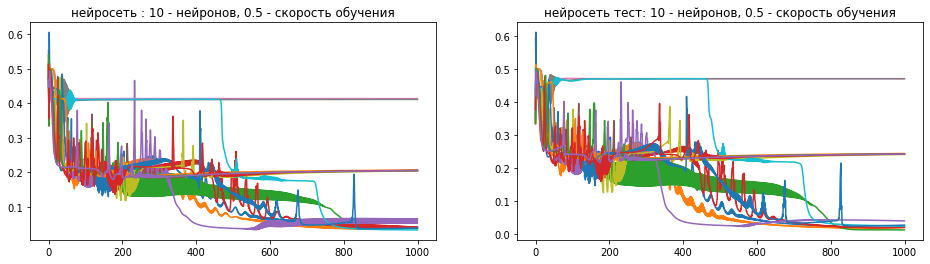

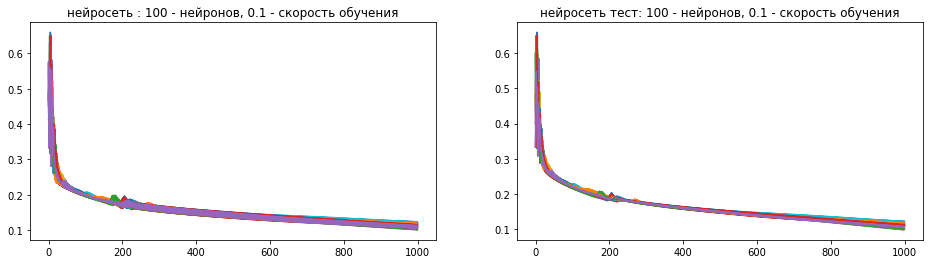

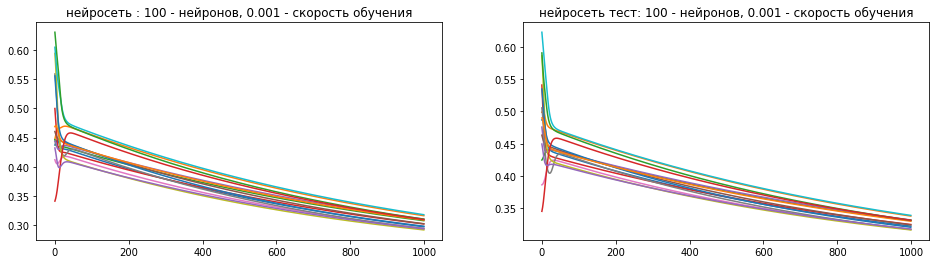

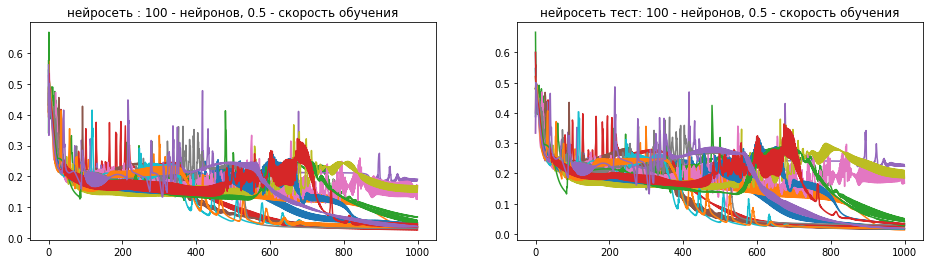

In [32]:
### Эксперимент с сетью из 2 слоев neuro_net2 (аналогично запускаем сеть из 3-х слоев neuro_net3 )
epochs = 1000

Error_exp_ = pd.DataFrame(data=np.array([[0,0,0,0,0,0,0]]),columns = ['neuron','learning_rate','epoch','error','mean accuracy','std accuracy','error_test'])
ik=0
for neuron_ in [1,5,10,100]:
  # меняю число нейронов скрытого сло
  #print(neuron_)
  for n_ in [0.1, 0.001, 0.5]:
    # меняю скорость обучения
    eerors = []
    eerorst = []
    acc =[]
    plt.figure(figsize=(16,4))
    for j in range(15):
      
      # будем делать несколько перезапусков - сейчас 15

      #print(j)
      # Запускаем сеть
      errors, accuracy, w1,w0 ,layer2, layer2t, errorst  = neuro_net2(neuro=neuron_, n = n_,epoch=epochs, X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test, test_v=1 )
      
      # пишем ошибку и точность из последней эпохи
      eerors.append(errors[-1])
      eerorst.append(errorst[-1])
      acc.append(accuracy)
      plt.subplot(1,2,1)
      plt.plot(range(epochs),errors)
      plt.subplot(1,2,2)
      plt.plot(range(epochs),errorst)
    plt.subplot(1,2,1)
    plt.title('нейросеть : '+str(neuron_)+' - нейронов, '+ str(n_)+' - скорость обучения')
    plt.subplot(1,2,2)
    plt.title('нейросеть тест: '+str(neuron_)+' - нейронов, '+ str(n_)+' - скорость обучения')
    plt.show()
    Error_exp_.loc[ik,['neuron','learning_rate','epoch','error','mean accuracy','std accuracy','error_test']] = [neuron_,n_,epochs ,np.mean(eerors),np.mean(acc),np.std(acc),np.mean(eerorst)]
    ik +=1

In [33]:
# ТАБЛИЧКА С РЕЗУЛЬТАТАМИ !!!!
Error_exp_

,neuron,learning_rate,epoch,error,mean accuracy,std accuracy,error_test
0,1.0,0.100,1000.0,0.411340,58.866019,0.318662,0.460607
1,1.0,0.001,1000.0,0.452912,54.708754,0.768580,0.455801
2,1.0,0.500,1000.0,0.411633,58.836674,0.289097,0.465333
3,5.0,0.100,1000.0,0.094020,90.597956,1.943054,0.083638
4,5.0,0.001,1000.0,0.433715,56.628472,0.752164,0.438829
5,5.0,0.500,1000.0,0.168432,83.156826,13.945003,0.177897
6,10.0,0.100,1000.0,0.095908,90.409189,1.143897,0.085634
7,10.0,0.001,1000.0,0.416305,58.369546,0.944889,0.424121
8,10.0,0.500,1000.0,0.156158,84.384185,12.587353,0.170277
9,100.0,0.100,1000.0,0.112694,88.730571,0.615474,0.110771


РЕзультаты:
- лучшая по средней аккуратности сеть 100 нейронов lr=0.5, но дисперсия 5.5%
- следующая по точности сеть 5 нейронов lr=0.1 и дисперсия лучше (2%) - более устойчиво обучается

Вывод: Имеет смысл искать сеть внутри интервала от 5 до 10 нейронов 

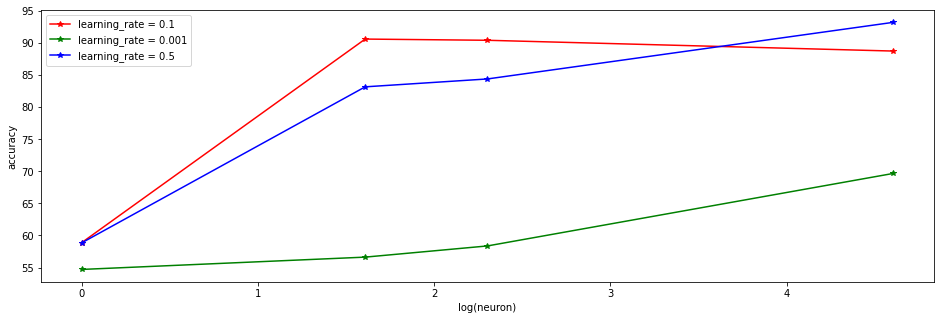

In [34]:
# ГРАФИКИ С РЕЗУЛЬТАТАМИ !!!! (точность по числу нейронов и скорости обучения)
e1 = Error_exp_.loc[Error_exp_['learning_rate']==0.1,['mean accuracy']]
e2 = Error_exp_.loc[Error_exp_['learning_rate']==0.001,['mean accuracy']]
e3 = Error_exp_.loc[Error_exp_['learning_rate']==0.5,['mean accuracy']]
plt.figure(figsize=(16,5))
neuron = np.log([1,5,10,100])
plt.xlabel('log(neuron)')
plt.ylabel('accuracy')
plt.plot(neuron,e1,'-*r',label = 'learning_rate = 0.1')
plt.plot(neuron,e2,'-*g',label = 'learning_rate = 0.001')
plt.plot(neuron,e3,'-*b',label = 'learning_rate = 0.5')
plt.legend()
plt.show()

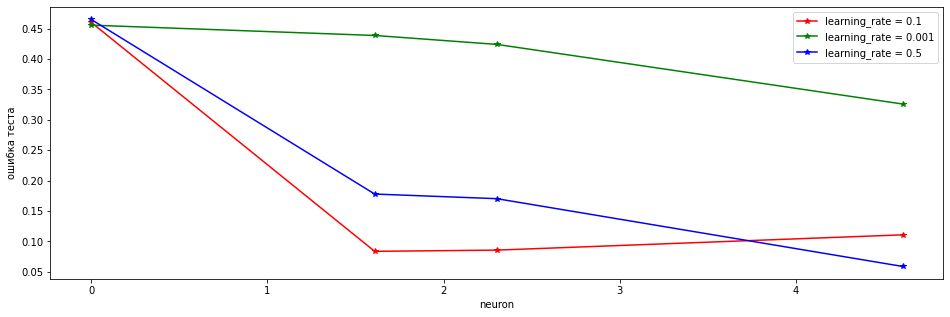

In [35]:
# ГРАФИКИ С РЕЗУЛЬТАТАМИ !!!! (ошибка на тестах по числу нейронов и скорости обучения)
e1 = Error_exp_.loc[Error_exp_['learning_rate']==0.1,['error_test']]
e2 = Error_exp_.loc[Error_exp_['learning_rate']==0.001,['error_test']]
e3 = Error_exp_.loc[Error_exp_['learning_rate']==0.5,['error_test']]
plt.figure(figsize=(16,5))

plt.xlabel('neuron')
plt.ylabel('ошибка теста')
neuron = np.log([1,5,10,100])
plt.plot(neuron,e1,'-*r',label = 'learning_rate = 0.1')
plt.plot(neuron,e2,'-*g',label = 'learning_rate = 0.001')
plt.plot(neuron,e3,'-*b',label = 'learning_rate = 0.5')
plt.legend()
plt.show()

# Анализ сводной таблицы и графики :
 - больше нейронов - выше точность обучения (при одинаковой скорости)
 - низкая скорость обучения меньше точность (не дошли)
 - 0.001 плохая скорость для этой сети


# Рекомендации:

- нейронки работают от случайной начальной точки - делаем много перезапусков для анализа архитектуры и осредняем результаты

- нейронки работают от случайной начальной точки - делаем много перезапусков дляпоиска лучшего варианта, если делаем обучение для работы

- Делаем таблички и графики
- Проводим анализ результатов: оцениваем средние ошибки(точности) архитектур и дисперсии ошибок (точности)  - потом делаем выводы!!


Для этой задачи можно проверить влияние размера выборки, включать/выключать нормализацию данных, проверить поведение по числу эпох и т.п.

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
C:\Users\1\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


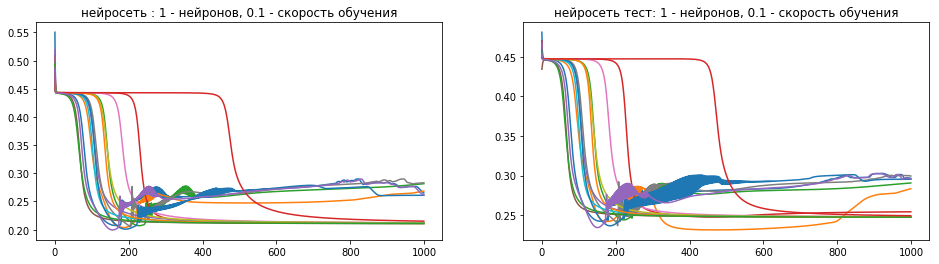

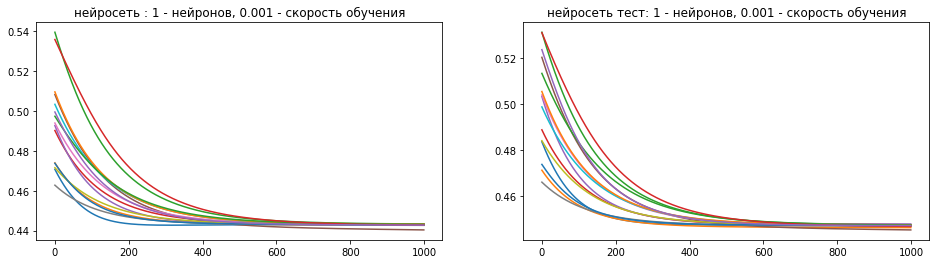

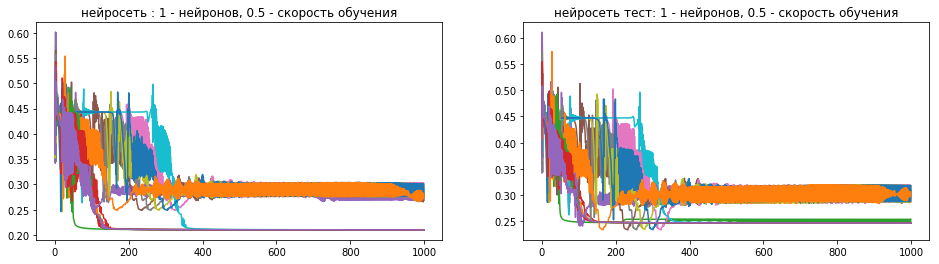

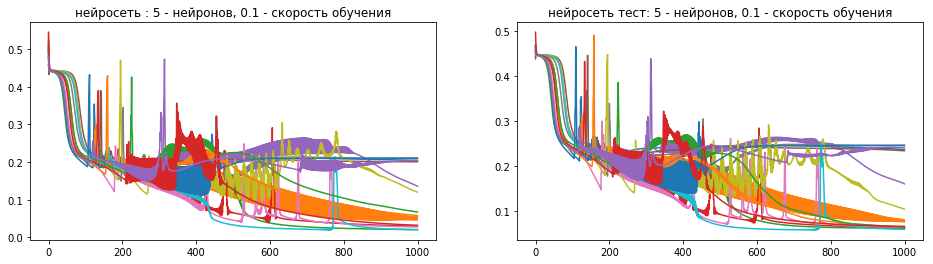

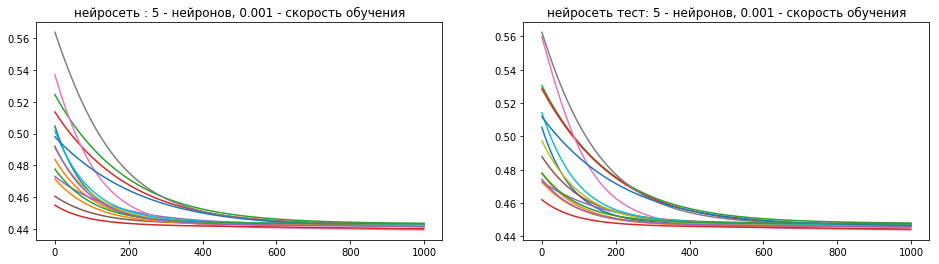

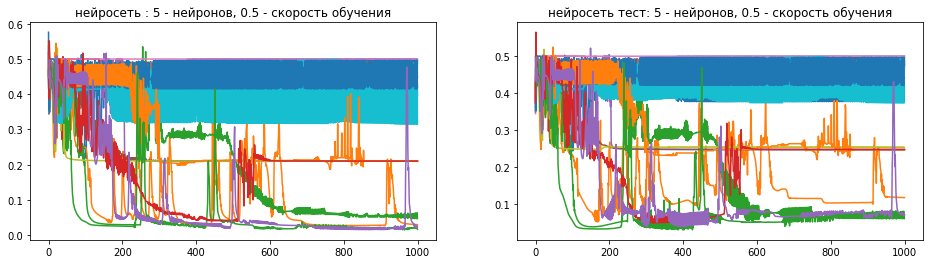

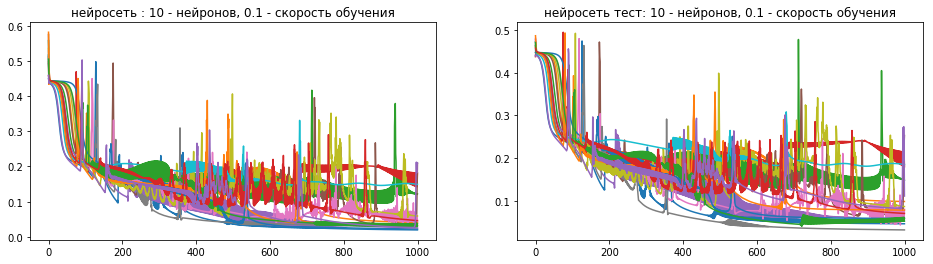

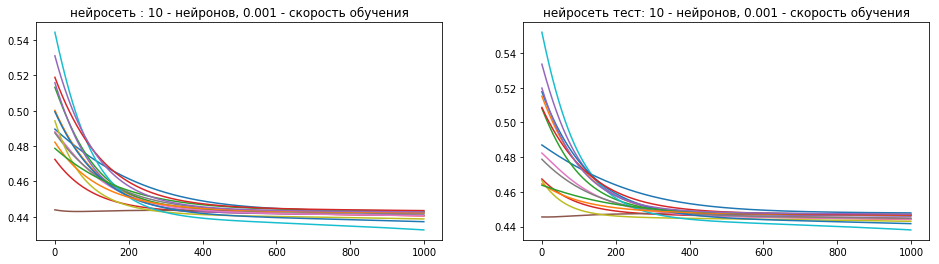

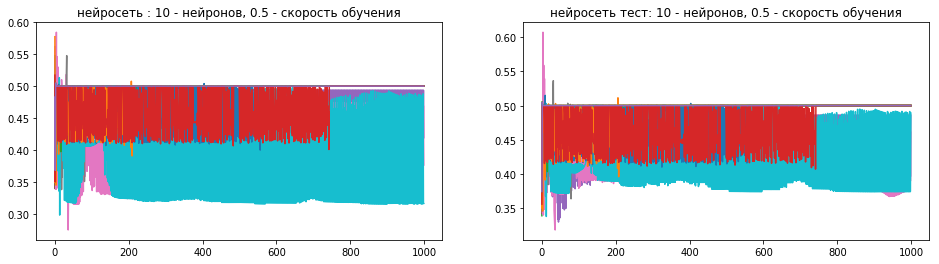

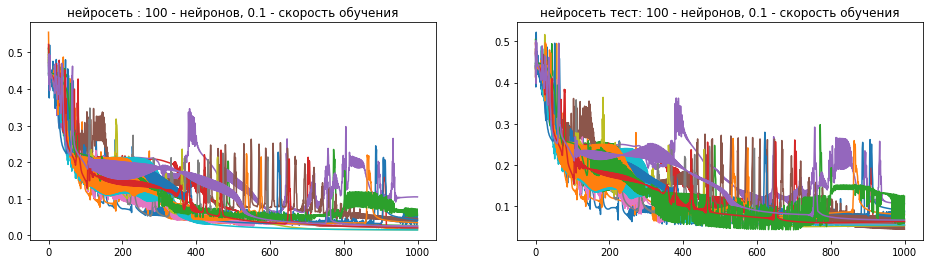

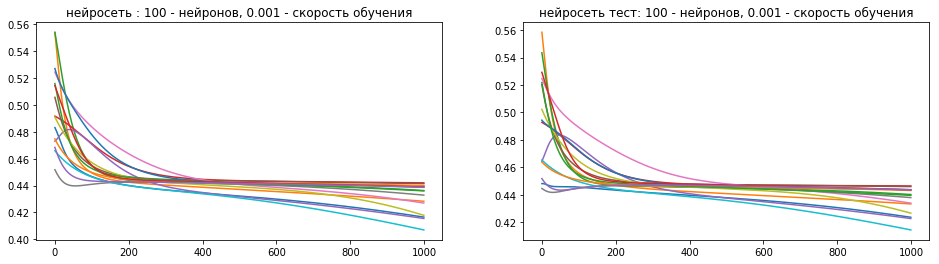

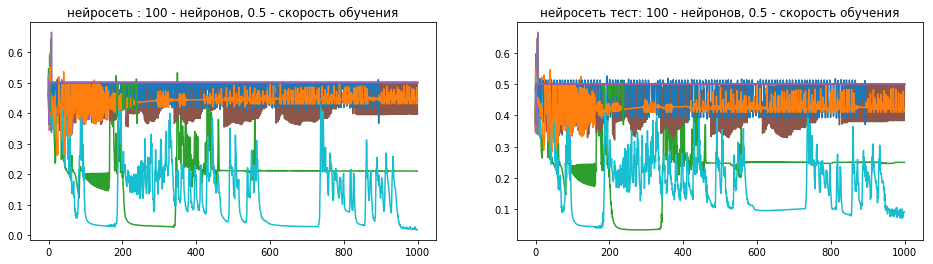

In [6]:
### Эксперимент с сетью из 2 слоев neuro_net2 (аналогично запускаем сеть из 3-х слоев neuro_net3 )
epochs = 1000

Error_exp_ = pd.DataFrame(data=np.array([[0,0,0,0,0,0,0]]),columns = ['neuron','learning_rate','epoch','error','mean accuracy','std accuracy','error_test'])
ik=0
for neuron_ in [1,5,10,100]:
  # меняю число нейронов скрытого сло
  #print(neuron_)
  for n_ in [0.1, 0.001, 0.5]:
    # меняю скорость обучения
    eerors = []
    eerorst = []
    acc =[]
    plt.figure(figsize=(16,4))
    for j in range(15):
      
      # будем делать несколько перезапусков - сейчас 15

      #print(j)
      # Запускаем сеть
      errors, accuracy, w1,w0 ,layer2, layer2t, errorst  = neuro_net3(neuro=neuron_, n = n_,epoch=epochs, X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test, test_v=1 )
      
      # пишем ошибку и точность из последней эпохи
      eerors.append(errors[-1])
      eerorst.append(errorst[-1])
      acc.append(accuracy)
      plt.subplot(1,2,1)
      plt.plot(range(epochs),errors)
      plt.subplot(1,2,2)
      plt.plot(range(epochs),errorst)
    plt.subplot(1,2,1)
    plt.title('нейросеть : '+str(neuron_)+' - нейронов, '+ str(n_)+' - скорость обучения')
    plt.subplot(1,2,2)
    plt.title('нейросеть тест: '+str(neuron_)+' - нейронов, '+ str(n_)+' - скорость обучения')
    plt.show()
    Error_exp_.loc[ik,['neuron','learning_rate','epoch','error','mean accuracy','std accuracy','error_test']] = [neuron_,n_,epochs ,np.mean(eerors),np.mean(acc),np.std(acc),np.mean(eerorst)]
    ik +=1

In [7]:
# ТАБЛИЧКА С РЕЗУЛЬТАТАМИ !!!! для сети 3- слоя
Error_exp_

,neuron,learning_rate,epoch,error,mean accuracy,std accuracy,error_test
0,1.0,0.100,1000.0,0.235123,76.487675,2.910653,0.266500
1,1.0,0.001,1000.0,0.442806,55.719389,0.069871,0.446980
2,1.0,0.500,1000.0,0.244196,75.580422,3.759097,0.273201
3,5.0,0.100,1000.0,0.106373,89.362693,7.735240,0.133128
4,5.0,0.001,1000.0,0.442145,55.785489,0.111640,0.446301
5,5.0,0.500,1000.0,0.249329,75.067119,16.763199,0.289176
6,10.0,0.100,1000.0,0.081991,91.800867,6.888259,0.102109
7,10.0,0.001,1000.0,0.440768,55.923214,0.276160,0.444963
8,10.0,0.500,1000.0,0.474119,52.588069,5.510152,0.495717
9,100.0,0.100,1000.0,0.034182,96.581786,2.226081,0.071960
